In [1]:
import os
# Open the folders and see the first 30 entries for Ground Truth and B-Scans

print("=" * 40)
print('The first 30 entries of Ground Truth')
print("=" * 40)
os.chdir('/kaggle/input/gpr-max-deep-learning-challenge-gdlc/Training_Labels/Training_Labels')
os.system('ls -d $(ls | head -30)')
print(" ")
print("=" * 40)
print('The first 30 entries of B-Scans')
print("=" * 40)
os.chdir('/kaggle/input/gpr-max-deep-learning-challenge-gdlc/Training_Bscan/Training_Bscan')
os.system('ls -d $(ls | head -30)')

The first 30 entries of Ground Truth
Model_0.npy
Model_1.npy
Model_10.npy
Model_100.npy
Model_1000.npy
Model_1001.npy
Model_1002.npy
Model_1003.npy
Model_1004.npy
Model_1005.npy
Model_1006.npy
Model_1007.npy
Model_1008.npy
Model_1009.npy
Model_101.npy
Model_1010.npy
Model_1011.npy
Model_1012.npy
Model_1013.npy
Model_1014.npy
Model_1015.npy
Model_1016.npy
Model_1017.npy
Model_1018.npy
Model_1019.npy
Model_102.npy
Model_1020.npy
Model_1021.npy
Model_1022.npy
Model_1023.npy
 
The first 30 entries of B-Scans
Bscan_0.npy
Bscan_1.npy
Bscan_10.npy
Bscan_100.npy
Bscan_1000.npy
Bscan_1001.npy
Bscan_1002.npy
Bscan_1003.npy
Bscan_1004.npy
Bscan_1005.npy
Bscan_1006.npy
Bscan_1007.npy
Bscan_1008.npy
Bscan_1009.npy
Bscan_101.npy
Bscan_1010.npy
Bscan_1011.npy
Bscan_1012.npy
Bscan_1013.npy
Bscan_1014.npy
Bscan_1015.npy
Bscan_1016.npy
Bscan_1017.npy
Bscan_1018.npy
Bscan_1019.npy
Bscan_102.npy
Bscan_1020.npy
Bscan_1021.npy
Bscan_1022.npy
Bscan_1023.npy


ls: write error: Broken pipe
ls: write error: Broken pipe


0

10.2953
1.0
(224, 224)


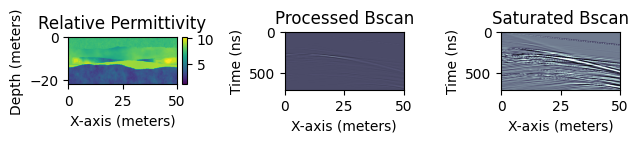

9.56279
1.0
(224, 224)


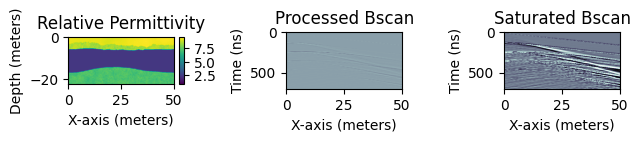

9.85596
1.0
(224, 224)


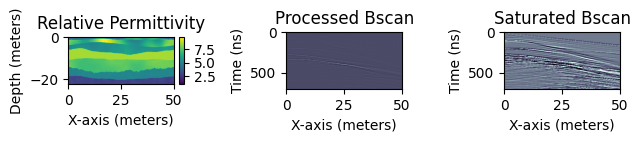

9.40623
1.0
(224, 224)


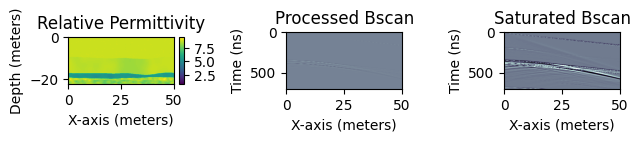

8.72348
1.0
(224, 224)


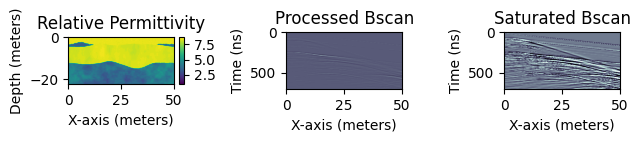

9.62997
1.0
(224, 224)


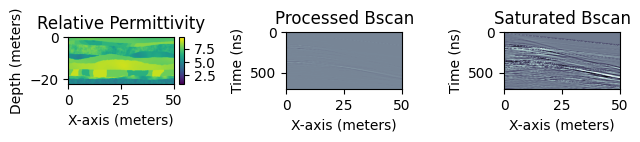

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import cv2

os.chdir('/kaggle/input/gpr-max-deep-learning-challenge-gdlc')

# Open the ind Bscans and their corresponding labels
ind = [55, 62, 78, 66, 30, 4200]


# Plot with units and labels
for i in ind:
    label = np.load('./Training_Labels/Training_Labels/Model_{}.npy'.format(i))
    bscan = np.load('./Training_Bscan/Training_Bscan/Bscan_{}.npy'.format(i))
    print(label.max())
    print(label.min())
    print(np.shape(label))
    plt.subplot(1,3,1)
    plt.imshow(label, extent=[0, 50, -22, 0])
    plt.title('Relative Permittivity')

    plt.xlabel('X-axis (meters)')
    plt.ylabel('Depth (meters)')   
    ax = plt.gca()
    im = ax.imshow(label, extent=[0, 50, -22, 0])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
   
    plt.subplot(1,3,2)
    plt.imshow(bscan, extent=[0,50, 700, 0],aspect = 0.035,cmap='bone')
    plt.title('Processed Bscan')
    plt.xlabel('X-axis (meters)')
    plt.ylabel('Time (ns)')
    
    # Saturate Bscan for illustration purposes     
    bscan = bscan / np.max(np.abs(bscan))
    bscan[bscan > 0.02] =  0.02
    bscan[bscan < -0.02] =  -0.02
    plt.subplot(1,3,3)
    plt.imshow(bscan, extent=[0,50, 700, 0],aspect = 0.035,cmap='bone')
    plt.xlabel('X-axis (meters)')
    plt.title('Saturated Bscan')
    plt.ylabel('Time (ns)')
    plt.tight_layout()
    plt.show()



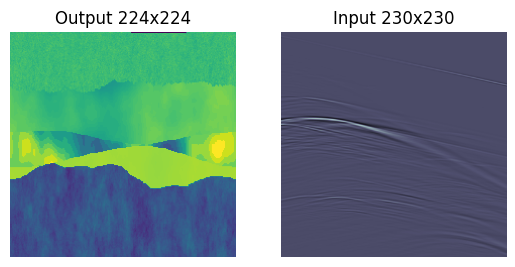

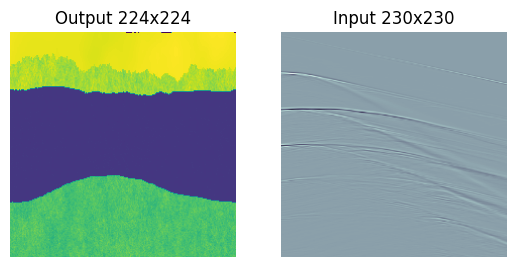

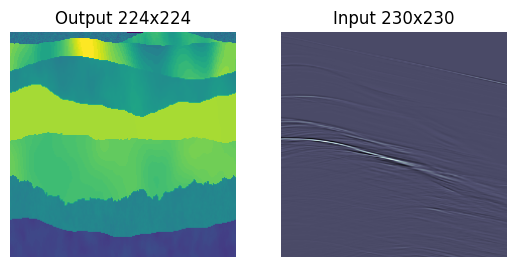

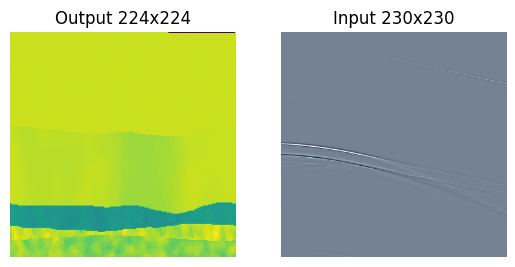

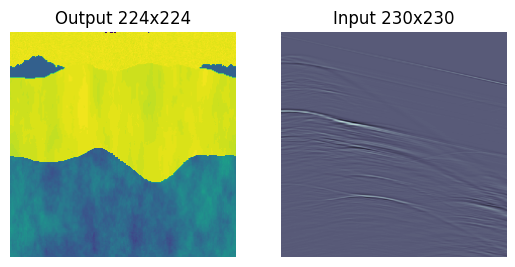

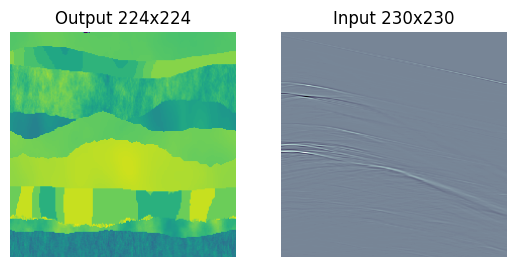

In [3]:
# Plot in abstract inputs - outputs format
for i in ind:
    label = np.load('./Training_Labels/Training_Labels/Model_{}.npy'.format(i), mmap_mode='r')
    bscan = np.load('./Training_Bscan/Training_Bscan/Bscan_{}.npy'.format(i), mmap_mode='r')

    plt.subplot(1,2,1)
    plt.imshow(label)
    plt.title('Output 224x224')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(bscan, cmap='bone')
    plt.title('Input 230x230')

    plt.axis('off')
    
    plt.show()